[*********************100%***********************]  1 of 1 completed


Head of the dataset:
Price          Adj Close         Close          High           Low  \
Ticker     TATAMOTORS.NS TATAMOTORS.NS TATAMOTORS.NS TATAMOTORS.NS   
Date                                                                 
2020-01-02    192.553802    193.750000    194.699997    184.600006   
2020-01-03    189.920181    191.100006    195.649994    189.250000   
2020-01-06    184.503815    185.649994    191.000000    185.050003   
2020-01-07    183.559677    184.699997    189.399994    182.300003   
2020-01-08    181.422958    182.550003    184.199997    180.199997   

Price               Open        Volume Price_Change Category  
Ticker     TATAMOTORS.NS TATAMOTORS.NS                        
Date                                                          
2020-01-02    185.000000      57289863     9.300003        1  
2020-01-03    192.899994      47572728    -2.649994        0  
2020-01-06    191.000000      28621212    -5.450012        0  
2020-01-07    187.000000      34995035  

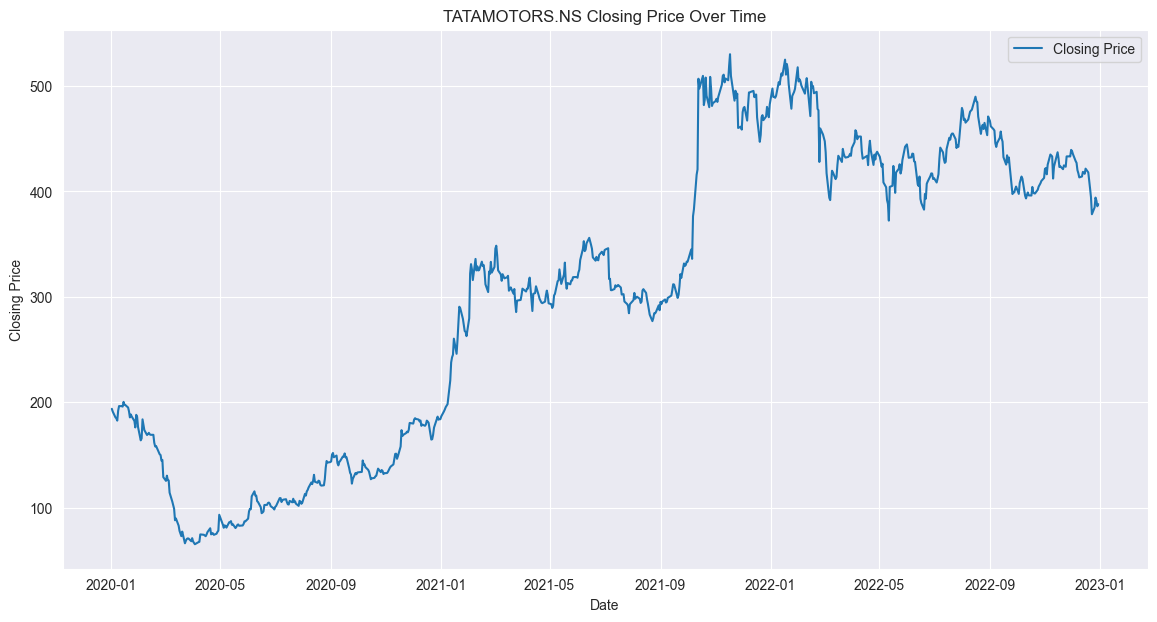

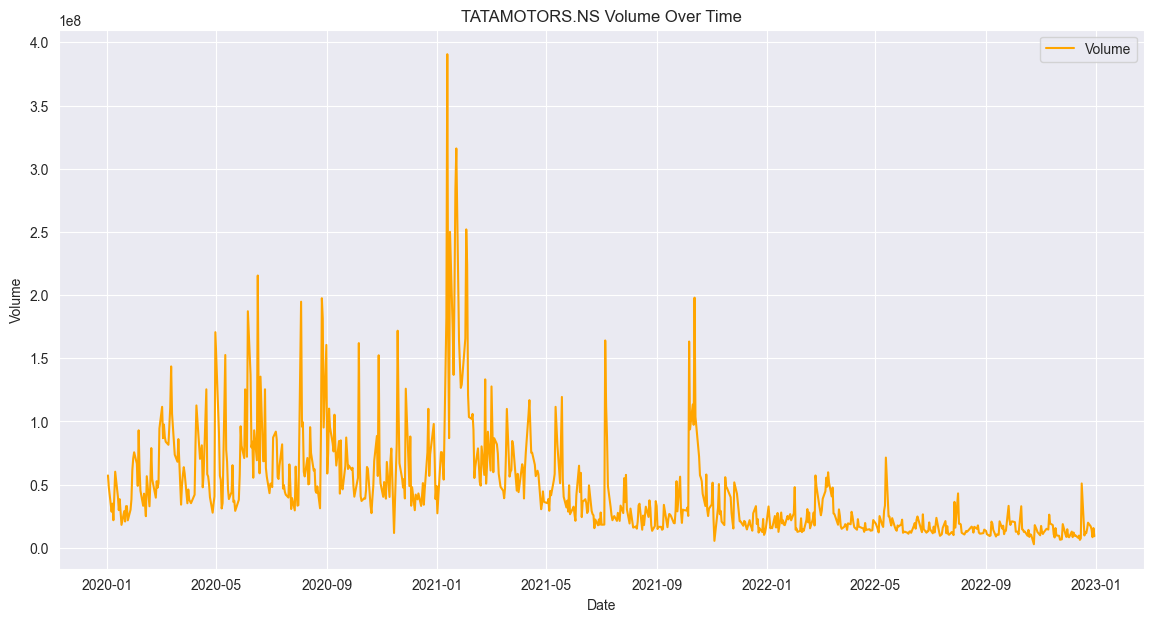

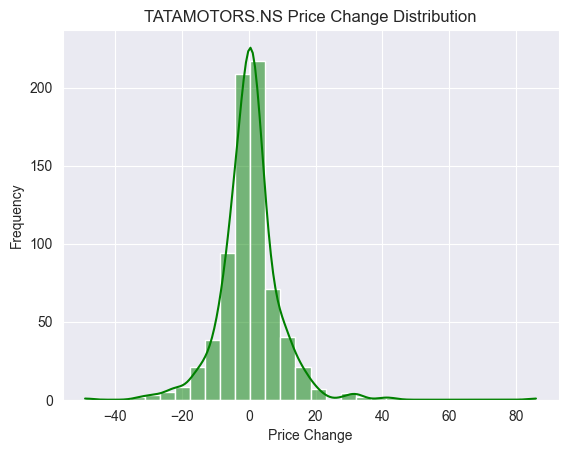

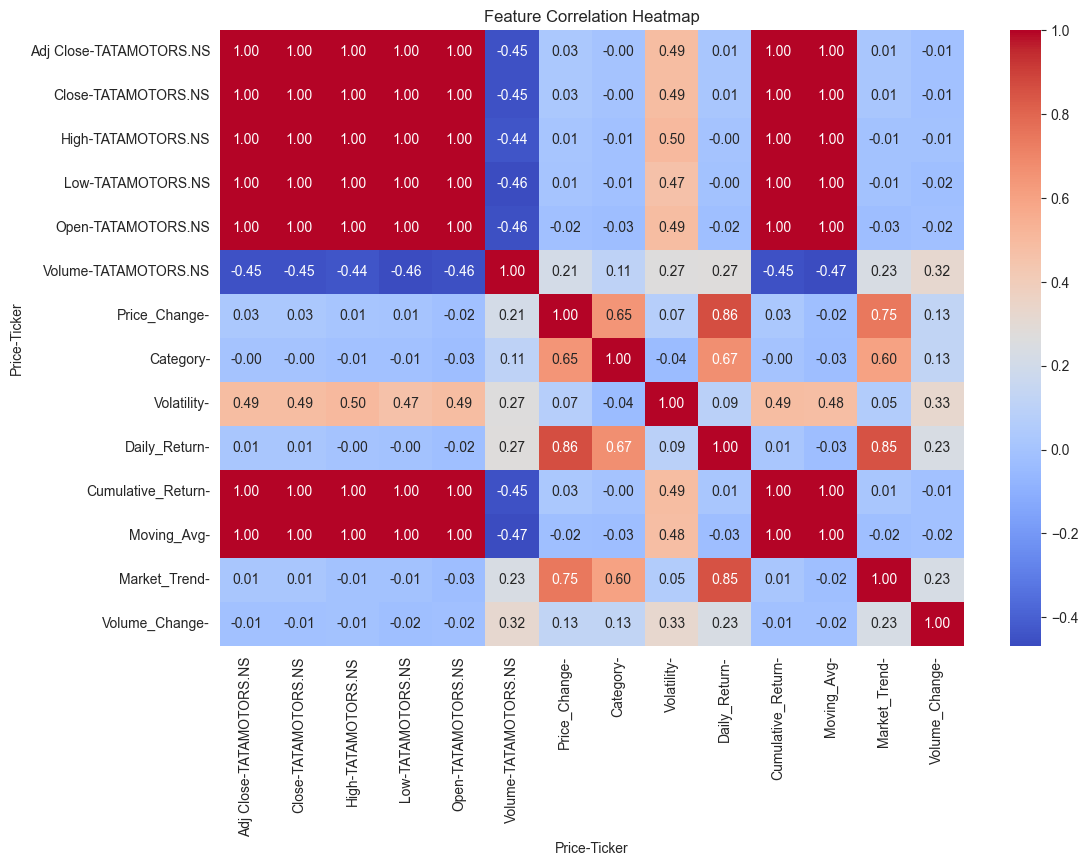

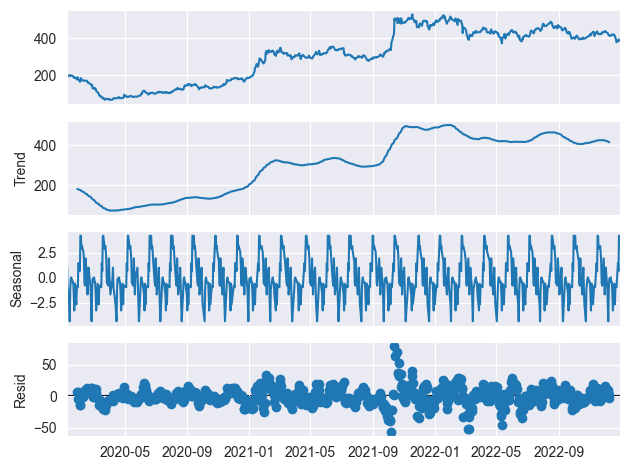

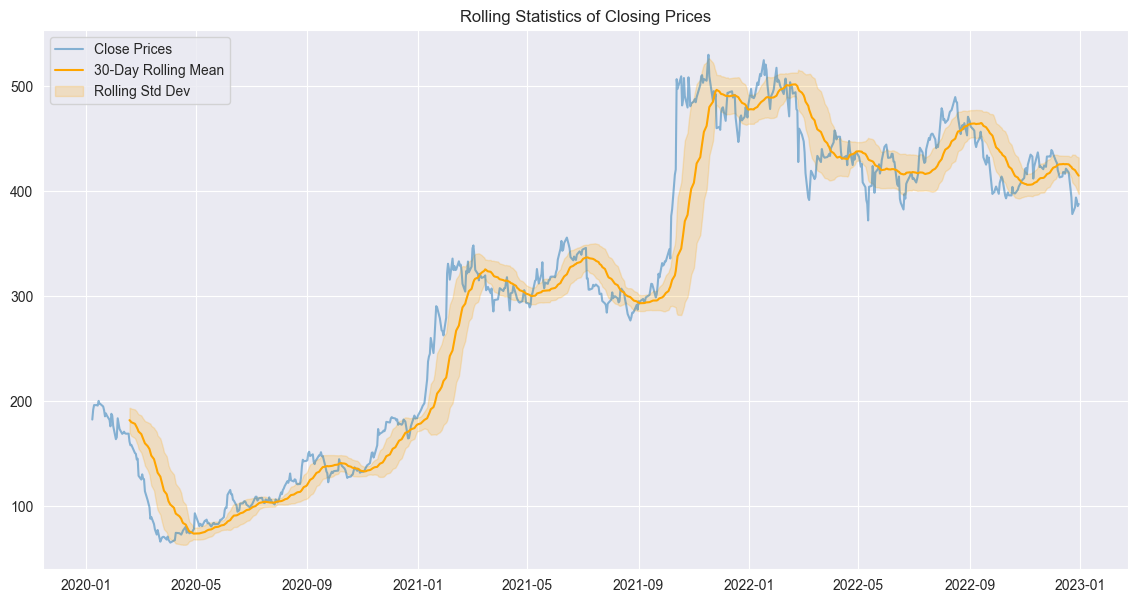

ValueError: Data for column "Open" must be ALL float or int.

In [71]:
# Import statements
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier
import mplfinance as mpf
import warnings
warnings.filterwarnings('ignore')

class Visualization:
    @staticmethod
    def plot_model_accuracies(model_accuracies):
        model_names = [result['Model'] for result in model_accuracies]
        accuracies = [result['Accuracy'] for result in model_accuracies]

        plt.figure(figsize=(10, 6))
        sns.barplot(x=model_names, y=accuracies, palette='viridis')
        plt.title('Model Accuracies')
        plt.xlabel('Models')
        plt.ylabel('Accuracy')
        plt.xticks(rotation=45)
        plt.ylim(0, 1)
        plt.grid(axis='y')
        plt.show()

    @staticmethod
    def time_series_decomposition(data):
        from statsmodels.tsa.seasonal import seasonal_decompose
        decomposition = seasonal_decompose(data['Close'], model='additive', period=30)
        decomposition.plot()
        plt.show()

    @staticmethod
    def candlestick_chart_with_indicators(data, stock_symbol):
        # Add moving averages for visualization
        data['5-Day MA'] = data['Close'].rolling(window=5).mean()
        data['10-Day MA'] = data['Close'].rolling(window=10).mean()

        # Use mplfinance to plot the candlestick chart
        mpf.plot(data,
                 type='candle',
                 style='charles',
                 volume=True,
                 mav=(5, 10),  # Moving averages: 5-day and 10-day
                 title=f"{stock_symbol} Candlestick Chart with Moving Averages",
                 show_nontrading=True)
    @staticmethod
    def rolling_statistics(data):
        data['Rolling_Mean'] = data['Close'].rolling(window=30).mean()
        data['Rolling_Std'] = data['Close'].rolling(window=30).std()
        plt.figure(figsize=(14, 7))
        plt.plot(data['Close'], label='Close Prices', alpha=0.5)
        plt.plot(data['Rolling_Mean'], label='30-Day Rolling Mean', color='orange')
        plt.fill_between(data.index,
                         data['Rolling_Mean'] - data['Rolling_Std'],
                         data['Rolling_Mean'] + data['Rolling_Std'],
                         color='orange', alpha=0.2, label='Rolling Std Dev')
        plt.title("Rolling Statistics of Closing Prices")
        plt.legend()
        plt.show()

    @staticmethod
    def volume_vs_price_change(data):
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x=data['Volume'], y=data['Price_Change'], hue=data['Category'], palette='viridis')
        plt.title("Volume vs. Price Change")
        plt.xlabel("Volume")
        plt.ylabel("Price Change")
        plt.show()

    @staticmethod
    def daily_return_distribution(data):
        plt.figure(figsize=(10, 6))
        sns.kdeplot(data[data['Category'] == 1]['Daily_Return'], label="Positive Price Change", shade=True, color='green')
        sns.kdeplot(data[data['Category'] == 0]['Daily_Return'], label="Negative Price Change", shade=True, color='red')
        plt.title("Daily Return Distribution by Category")
        plt.xlabel("Daily Return")
        plt.ylabel("Density")
        plt.legend()
        plt.show()

    @staticmethod
    def candlestick_chart(data, stock_symbol):
        import mplfinance as mpf
        mpf.plot(data, type='candle', style='charles', volume=True,
                 title=f"{stock_symbol} Candlestick Chart",
                 mav=(5, 10),
                 show_nontrading=True)

    @staticmethod
    def volatility_over_time(data):
        plt.figure(figsize=(12, 6))
        plt.plot(data['Volatility'], label='Volatility', color='purple')
        plt.title("Volatility Over Time")
        plt.xlabel("Date")
        plt.ylabel("Volatility")
        plt.legend()
        plt.grid(True)
        plt.show()

    @staticmethod
    def feature_importance(model, feature_names):
        importances = model.feature_importances_
        importance_df = pd.DataFrame({"Feature": feature_names, "Importance": importances})
        importance_df.sort_values(by="Importance", ascending=False, inplace=True)
        plt.figure(figsize=(10, 6))
        sns.barplot(data=importance_df, x="Importance", y="Feature", palette="viridis")
        plt.title("Feature Importance")
        plt.show()

    @staticmethod
    def lagged_features_analysis(data):
        pd.plotting.lag_plot(data['Close'], lag=5)
        plt.title("Lag Plot with 5-Day Lag")
        plt.show()


    @staticmethod
    def plot_split_accuracies(results_df):
        """
        Plot the accuracies of models across different train-test split ratios.
        """
        plt.figure(figsize=(12, 8))

        # Group by model name and plot accuracies across test sizes
        for model_name in results_df['Model'].unique():
            model_data = results_df[results_df['Model'] == model_name]
            plt.plot(
                model_data['Test Size'],
                model_data['Accuracy'],
                marker='o',
                label=model_name
            )

        plt.title('Model Accuracies Across Train-Test Split Ratios')
        plt.xlabel('Train-Test Split Ratio (Test Size)')
        plt.ylabel('Accuracy')
        plt.xticks(results_df['Test Size'].unique())  # Ensure all test sizes are shown on x-axis
        plt.legend()
        plt.grid(True)
        plt.show()

    @staticmethod
    def correlation_heatmap(data):
        plt.figure(figsize=(12, 8))
        correlation_matrix = data.corr()
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
        plt.title("Feature Correlation Heatmap")
        plt.show()

class StockPricePredictor:
    def __init__(self, stock_symbol, start_date, end_date):
        self.stock_symbol = stock_symbol
        self.start_date = start_date
        self.end_date = end_date
        self.data = None
        self.X_train = None
        self.X_test = None
        self.y_train = None
        self.y_test = None
        self.X_train_balanced = None
        self.y_train_balanced = None

    def fetch_data(self):
        data = yf.download(self.stock_symbol, start=self.start_date, end=self.end_date)
        data['Price_Change'] = data['Close'].diff()
        data['Category'] = (data['Price_Change'] > 0).astype(int)
        self.data = data.dropna()

        # Data exploration
        print("Head of the dataset:")
        print(self.data.head())
        print("\nTail of the dataset:")
        print(self.data.tail())
        print("\nDataset Information:")
        print(self.data.info())
        print("\nDescriptive Statistics:")
        print(self.data.describe())
        print("\nDataset Shape:")
        print(self.data.shape)

        # Data visualization
        plt.figure(figsize=(14, 7))
        plt.plot(self.data['Close'], label='Closing Price')
        plt.title(f"{self.stock_symbol} Closing Price Over Time")
        plt.xlabel("Date")
        plt.ylabel("Closing Price")
        plt.legend()
        plt.grid(True)
        plt.show()

        plt.figure(figsize=(14, 7))
        plt.plot(self.data['Volume'], label='Volume', color='orange')
        plt.title(f"{self.stock_symbol} Volume Over Time")
        plt.xlabel("Date")
        plt.ylabel("Volume")
        plt.legend()
        plt.grid(True)
        plt.show()

        sns.histplot(self.data['Price_Change'], kde=True, bins=30, color='green')
        plt.title(f"{self.stock_symbol} Price Change Distribution")
        plt.xlabel("Price Change")
        plt.ylabel("Frequency")
        plt.grid(True)
        plt.show()

    def feature_engineering(self):
        self.data['Volatility'] = self.data['High'] - self.data['Low']
        self.data['Daily_Return'] = self.data['Close'].pct_change()
        self.data['Cumulative_Return'] = (1 + self.data['Daily_Return']).cumprod()
        self.data['Moving_Avg'] = self.data['Close'].rolling(window=5).mean()
        self.data['Market_Trend'] = self.data['Close'] / self.data['Open'] - 1
        self.data['Volume_Change'] = self.data['Volume'].pct_change()
        self.data = self.data.dropna()

    def prepare_data(self):
        features = ['Open', 'High', 'Low', 'Close', 'Volume', 'Volatility', 'Daily_Return',
                    'Cumulative_Return', 'Moving_Avg', 'Market_Trend', 'Volume_Change']
        X = self.data[features]
        y = self.data['Category']

        scaler = MinMaxScaler()
        X_scaled = scaler.fit_transform(X)
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
        smote = SMOTE(random_state=42)
        self.X_train_balanced, self.y_train_balanced = smote.fit_resample(self.X_train, self.y_train)

    def train_and_evaluate_models(self):
        """Train and evaluate multiple models."""
        models = {
            "Support Vector Machine": SVC(random_state=42, probability=True),
            "Logistic Regression": LogisticRegression(random_state=42),
            "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5)

        }

        results = []  # To store model results

        for model_name, model in models.items():
            print(f"Training {model_name}...")
            model.fit(self.X_train_balanced, self.y_train_balanced)
            predictions = model.predict(self.X_test)

            # Collect evaluation metrics
            accuracy = accuracy_score(self.y_test, predictions)
            class_report = classification_report(self.y_test, predictions)
            conf_matrix = confusion_matrix(self.y_test, predictions)

            # Print metrics
            print(f"--- {model_name} ---")
            print(f"Accuracy: {accuracy:.2f}")
            print("Classification Report:\n", class_report)
            print("Confusion Matrix:\n", conf_matrix)
            print("\n")

            # Append results for summary
            results.append({
                "Model": model_name,
                "Accuracy": accuracy,
                "Confusion Matrix": conf_matrix,
                "Classification Report": class_report
            })

        return results

    def train_and_evaluate_with_splits(self, test_sizes):
        """Train and evaluate models across multiple train-test split ratios."""
        models = {
            "Support Vector Machine": SVC(random_state=42, probability=True),
            "Logistic Regression": LogisticRegression(random_state=42),
            "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5)
        }

        # To store results for all splits
        results_list = []

        for test_size in test_sizes:
           # Update train-test split
            features = ['Open', 'High', 'Low', 'Close', 'Volume', 'Volatility', 'Daily_Return',
                        'Cumulative_Return', 'Moving_Avg', 'Market_Trend', 'Volume_Change']
            X = self.data[features]
            y = self.data['Category']

            scaler = MinMaxScaler()
            X_scaled = scaler.fit_transform(X)
            X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=test_size, random_state=42)
            smote = SMOTE(random_state=42)
            X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

            # Train and evaluate each model
            for model_name, model in models.items():
                model.fit(X_train_balanced, y_train_balanced)
                predictions = model.predict(X_test)

                # Collect evaluation metrics
                accuracy = accuracy_score(y_test, predictions)

                # Append results for tabular summary
                results_list.append({
                    "Model": model_name,
                    "Test Size": test_size,
                    "Accuracy": round(accuracy, 2)
                })

        # Convert results to a DataFrame and print it
        results_df = pd.DataFrame(results_list)
        print("\nSummary of Results Across Splits:")
        print(results_df)

        return results_df

class EnsembleMethods:
    @staticmethod
    def bagging(base_model, X_train, y_train, X_test, y_test):
        bagging_model = BaggingClassifier(base_model, n_estimators=10, random_state=42)
        bagging_model.fit(X_train, y_train)
        accuracy = bagging_model.score(X_test, y_test)
        return accuracy

    @staticmethod
    def boosting(X_train, y_train, X_test, y_test):
        boosting_model = AdaBoostClassifier(n_estimators=50, random_state=42)
        boosting_model.fit(X_train, y_train)
        accuracy = boosting_model.score(X_test, y_test)
        return accuracy

    @staticmethod
    def stacking(models, X_train, y_train, X_test, y_test):
        estimators = [(name, model) for name, model in models.items()]
        stacking_model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(), cv=5)
        stacking_model.fit(X_train, y_train)
        accuracy = stacking_model.score(X_test, y_test)
        return accuracy

    @staticmethod
    def monte_carlo_simulation(X, y, ensemble_method, base_model=None, models=None, runs=10):
        accuracies = []
        for _ in range(runs):
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)
            if ensemble_method == "bagging":
                accuracy = EnsembleMethods.bagging(base_model, X_train, y_train, X_test, y_test)
            elif ensemble_method == "boosting":
                accuracy = EnsembleMethods.boosting(X_train, y_train, X_test, y_test)
            elif ensemble_method == "stacking":
                accuracy = EnsembleMethods.stacking(models, X_train, y_train, X_test, y_test)
            else:
                raise ValueError("Invalid ensemble method")

            accuracies.append(accuracy)
        return accuracies

if __name__ == "__main__":
    predictor = StockPricePredictor('TATAMOTORS.NS', '2020-01-01', '2023-01-01')

    # Fetch and preprocess data
    predictor.fetch_data()
    predictor.feature_engineering()
    predictor.prepare_data()
    Visualization.correlation_heatmap(predictor.data)
    Visualization.time_series_decomposition(predictor.data)
    Visualization.rolling_statistics(predictor.data)
    Visualization.candlestick_chart_with_indicators(predictor.data, predictor.stock_symbol)

    # Train and evaluate the models
    model_results = predictor.train_and_evaluate_models()
    Visualization.plot_model_accuracies(model_results)

    # Define train-test split ratios
    test_sizes = [0.5, 0.6, 0.7, 0.8, 0.9]
    split_results_df = predictor.train_and_evaluate_with_splits(test_sizes)
    Visualization.plot_split_accuracies(split_results_df)

    # Prepare data for ensemble methods
    X, y = predictor.X_train_balanced, predictor.y_train_balanced
    base_model = RandomForestClassifier(random_state=42)
    stacking_models = {
        "SVC": SVC(probability=True, random_state=42),
        "KNN": KNeighborsClassifier(n_neighbors=5),
        "DecisionTree": DecisionTreeClassifier(random_state=42)
    }

    # Ensemble methods with Monte Carlo simulation
    bagging_accuracies = EnsembleMethods.monte_carlo_simulation(X, y, "bagging", base_model=base_model)
    boosting_accuracies = EnsembleMethods.monte_carlo_simulation(X, y, "boosting")
    stacking_accuracies = EnsembleMethods.monte_carlo_simulation(X, y, "stacking", models=stacking_models)

    # Visualize results
    accuracies_df = pd.DataFrame({
        "Bagging": bagging_accuracies,
        "Boosting": boosting_accuracies,
        "Stacking": stacking_accuracies
    })

    plt.figure(figsize=(10, 6))
    sns.boxplot(data=accuracies_df, palette="viridis")
    plt.title("Model Performance Across Monte Carlo Runs")
    plt.ylabel("Accuracy")
    plt.grid(axis="y")
    plt.show()
